<a href="https://colab.research.google.com/github/gkckdals3/ML_/blob/main/%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C(2%EC%B0%A8%EC%88%98%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

In [19]:
import glob
from google.colab import drive
import pandas as pd
drive.mount('/gdrive', force_remount=True)
#train 타겟값 target에 저장
target_table=pd.read_csv('/gdrive/MyDrive/SyntekaBio/train_output.csv').to_numpy()
target=target_table[:,1:].astype(float)
train_data =(sorted(glob.glob('/gdrive/MyDrive/SyntekaBio/train/PNG/*.png')))


Mounted at /gdrive


In [20]:
#전체 데이터 불러오기/데이터 10분에 1로 축소
for i in range (len(train_data)):
  train_data[i]=cv2.imread(train_data[i])
  train_data[i]=cv2.resize(train_data[i],dsize=(128, 128),interpolation=cv2.INTER_AREA)
  train_data[i]=train_data[i].astype(np.float32)/255
train_scaled=np.array(train_data)
train_scaled.shape

(501, 128, 128, 3)

In [21]:
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [22]:
from sklearn.model_selection import train_test_split

train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,target,test_size=0.2)
print('학습 데이터 shape : ', train_scaled.shape)
print('검증 데이터 shape : ', val_scaled.shape)
print('학습 타겟 shape : ', train_target.shape)
print('검증 타겟 shape : ', val_target.shape)

학습 데이터 shape :  (400, 128, 128, 3)
검증 데이터 shape :  (101, 128, 128, 3)
학습 타겟 shape :  (400, 1)
검증 타겟 shape :  (101, 1)


In [32]:
import keras
model = keras.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(padding='SAME'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 63, 63, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 508032)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               130056448 
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [34]:
import tensorflow
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.01), 
              metrics=['accuracy'])
print(train_scaled.shape)
print(train_target.shape)

(400, 128, 128, 3)
(400, 1)


In [35]:
history = model.fit(
            train_scaled, train_target, 
            validation_data = (val_scaled,val_target),
            batch_size = 32,
            epochs = 30
                    )

Epoch 1/30
13/13 [==============================] - 11s 782ms/step - loss: 1422.5205 - accuracy: 0.5300 - val_loss: 41.4091 - val_accuracy: 0.3465
Epoch 2/30
13/13 [==============================] - 10s 738ms/step - loss: 45.0227 - accuracy: 0.5450 - val_loss: 15.5880 - val_accuracy: 0.6535
Epoch 3/30
13/13 [==============================] - 10s 748ms/step - loss: 10.4394 - accuracy: 0.5775 - val_loss: 2.3843 - val_accuracy: 0.6535
Epoch 4/30
13/13 [==============================] - 10s 742ms/step - loss: 4.2116 - accuracy: 0.5950 - val_loss: 0.6811 - val_accuracy: 0.6634
Epoch 5/30
13/13 [==============================] - 10s 748ms/step - loss: 1.3839 - accuracy: 0.6700 - val_loss: 0.5090 - val_accuracy: 0.7723
Epoch 6/30
13/13 [==============================] - 10s 756ms/step - loss: 0.9367 - accuracy: 0.7550 - val_loss: 1.2377 - val_accuracy: 0.6733
Epoch 7/30
13/13 [==============================] - 10s 737ms/step - loss: 0.4807 - accuracy: 0.8450 - val_loss: 0.5631 - val_accuracy:

In [49]:
model.evaluate(val_scaled,val_target)

4/4 [==============================] - 1s 120ms/step - loss: 0.0564 - accuracy: 0.9802


[0.05644342675805092, 0.9801980257034302]

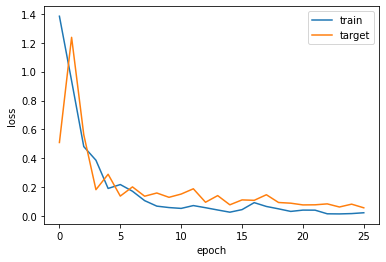

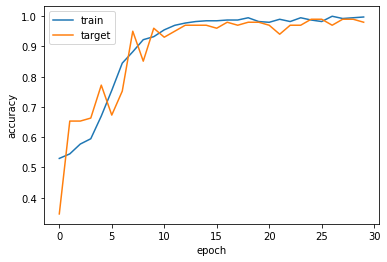

In [52]:
import matplotlib.pyplot as plt
plt.plot((history.history['loss'][4:]))
plt.plot((history.history['val_loss'][4:]))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','target'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','target'])

plt.show()